In [27]:
import pandas as pd
import numpy as np
import re
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


## First dataset : customer data 

In [25]:
df=pd.read_excel('/Users/leenaomrani/Desktop/vestiaire_case/csv_files/DIM_VC_USR_CUSTOMER.xls')
df

/var/folders/qn/mtl559_57tn77j5y4wb_w49c0000gn/T/ipykernel_26958/2887902853.py:1: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df=pd.read_excel('/Users/leenaomrani/Desktop/vestiaire_case/csv_files/DIM_VC_USR_CUSTOMER.xls')


,ID_CUSTOMER,ID_GENDER,DATE_NEW_BUYER,DATE_NEW_SELLER,DATE_CREATION,DATE_INACTIVE,DATE_LAST_LOGIN,ID_COUNTRY,DEVICE_BRAND,REGISTRATION_DEVICE,...,SELLER_SEGMENT,REGISTRATION_UTM_CAMPAIGN_NON_PERSISTENT,REGISTRATION_UTM_SOURCE_NON_PERSISTENT,REGISTRATION_UTM_MEDIUM_NON_PERSISTENT,REGISTRATION_UTM_CAMPAIGN_30D_PERSISTENT,REGISTRATION_UTM_SOURCE_30D_PERSISTENT,REGISTRATION_UTM_MEDIUM_30D_PERSISTENT,REGISTRATION_MARKETING_CHANNEL_NON_PERSISTENT,REGISTRATION_MARKETING_CHANNEL_30D_PERSISTENT,IS_ACCOUNT_VERIFIED
0,17257021,2,NaN,NaN,2022-06-27T16:52:12Z,NaN,2022-06-27T16:52:13Z,74,other,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,9117724,2,NaN,NaN,2019-12-07T10:37:28Z,NaN,2019-12-07T10:37:29Z,223,other,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,8862262,2,NaN,NaN,2019-10-14T03:40:34Z,NaN,2019-10-14T03:40:35Z,223,other,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,6757583,1,2018-04-28 00:00:00,2022-05-29 00:00:00,2018-04-25T23:26:26Z,NaN,2023-03-31T21:32:55Z,57,other,desktop,...,Low quality repeater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,14268557,0,NaN,NaN,2021-10-21T20:11:19Z,NaN,2021-10-21T20:11:20Z,74,iOS,smartphone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19939,91661,2,2013-04-15 00:00:00,NaN,2011-03-24T12:56:00Z,NaN,2023-01-28T23:28:14Z,74,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
19940,16812898,2,NaN,NaN,2022-05-08T17:25:01Z,NaN,2022-05-08T17:25:07Z,81,iOS,smartphone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
19941,11347815,3,NaN,NaN,2020-12-22T23:43:49Z,NaN,2020-12-22T23:43:51Z,223,iOS,smartphone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
19942,8264108,1,NaN,NaN,2019-03-26T22:12:27Z,NaN,2020-11-04T21:13:42Z,74,iOS,smartphone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### The distribution of GMV between Customers

In [ ]:
import plotly.express as px

# Assuming you have a DataFrame called 'df' with columns 'user segment' and 'GMV'
# Replace 'user segment' and 'GMV' with your actual column names

# Group the data by user segment and calculate the sum of GMV
segment_gmv = df.groupby('USER_SEGMENT')['GMV'].sum().sort_values(ascending=False).reset_index()

# Create an interactive bar plot using Plotly
fig = px.bar(segment_gmv, x='USER_SEGMENT', y='GMV', color='GMV')

# Customize the appearance of the plot
fig.update_layout(
    title='Distribution of GMV between Customer Segments',
    xaxis_title='User Segment',
    yaxis_title='GMV',
    xaxis={'categoryorder': 'total descending'},
    yaxis_tickformat='$,.0f'  # Format GMV values as currency
)

# Display the interactive plot
fig.show()

In [ ]:
df['DATE_CREATION'] = pd.to_datetime(df['DATE_CREATION'])

# Extract the year, month, and day into separate columns
df['year'] = df['DATE_CREATION'].apply(lambda x: x.year)
df['month'] = df['DATE_CREATION'].apply(lambda x: x.month)
df['day'] = df['DATE_CREATION'].apply(lambda x: x.day)

# Print the modified DataFrame
print(df)

                                             ID_CUSTOMER ID_GENDER  \
0                                               17257021         2   
1                                                9117724         2   
2                                                8862262         2   
3                                                6757583         1   
4                                               14268557         0   
...                                                  ...       ...   
19939                                              91661         2   
19940                                           16812898         2   
19941                                           11347815         3   
19942                                            8264108         1   
19943  8264108,1,,,2019-03-26T22:12:27Z,,2020-11-04T2...       NaN   

            DATE_NEW_BUYER      DATE_NEW_SELLER             DATE_CREATION  \
0                      NaN                  NaN 2022-06-27 16:52:12+00:00   
1    

In [ ]:
df['DATE_CREATION'] = pd.to_datetime(df['DATE_CREATION'])

# Extract only the date component from the datetime object
df['DATE_CREATION'] = df['DATE_CREATION'].dt.date

# Print the modified DataFrame
print(df)

                                             ID_CUSTOMER ID_GENDER  \
0                                               17257021         2   
1                                                9117724         2   
2                                                8862262         2   
3                                                6757583         1   
4                                               14268557         0   
...                                                  ...       ...   
19939                                              91661         2   
19940                                           16812898         2   
19941                                           11347815         3   
19942                                            8264108         1   
19943  8264108,1,,,2019-03-26T22:12:27Z,,2020-11-04T2...       NaN   

            DATE_NEW_BUYER      DATE_NEW_SELLER DATE_CREATION  \
0                      NaN                  NaN    2022-06-27   
1                      NaN   

In [ ]:
df

,ID_CUSTOMER,ID_GENDER,DATE_NEW_BUYER,DATE_NEW_SELLER,DATE_CREATION,DATE_LAST_LOGIN,ID_COUNTRY,DEVICE_BRAND,REGISTRATION_DEVICE,REGISTRATION_CHANNEL,...,DATE_LAST_SESSION,BRAZE_IS_OPTIN_PUSH,BRAZE_CURRENT_IDFA_STATUS,BRAZE_LAST_EVENT_DEVICE_PLATFORM,UPDATEDAT,BUYER_SEGMENT,SELLER_SEGMENT,year,month,day
0,17257021,2,NaN,NaN,2022-06-27,2022-06-27T16:52:13Z,74,other,desktop,web,...,NaN,NaN,NaN,NaN,2023-04-25T07:24:25.633Z,NaN,NaN,2022.0,6.0,27.0
1,9117724,2,NaN,NaN,2019-12-07,2019-12-07T10:37:29Z,223,other,desktop,web,...,NaN,NaN,NaN,NaN,2023-04-25T07:24:25.633Z,NaN,NaN,2019.0,12.0,7.0
2,8862262,2,NaN,NaN,2019-10-14,2019-10-14T03:40:35Z,223,other,desktop,web,...,NaN,NaN,NaN,NaN,2023-04-25T07:24:25.633Z,NaN,NaN,2019.0,10.0,14.0
3,6757583,1,2018-04-28 00:00:00,2022-05-29 00:00:00,2018-04-25,2023-03-31T21:32:55Z,57,other,desktop,web,...,2023-03-27T09:44:07Z,0.0,no,iOS,2023-04-25T07:24:25.633Z,Top buyers - low value,Low quality repeater,2018.0,4.0,25.0
4,14268557,0,NaN,NaN,2021-10-21,2021-10-21T20:11:20Z,74,iOS,smartphone,app,...,2021-10-21T18:11:20Z,0.0,yes,iOS,2023-04-25T07:24:25.633Z,NaN,NaN,2021.0,10.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19939,91661,2,2013-04-15 00:00:00,NaN,2011-03-24,2023-01-28T23:28:14Z,74,NaN,NaN,NaN,...,2021-11-26T11:58:36Z,0.0,not asked,iOS,2023-04-25T07:24:25.633Z,Low potential one timers,NaN,2011.0,3.0,24.0
19940,16812898,2,NaN,NaN,2022-05-08,2022-05-08T17:25:07Z,81,iOS,smartphone,app,...,NaN,1.0,NaN,iOS,2023-04-25T07:24:25.633Z,NaN,NaN,2022.0,5.0,8.0
19941,11347815,3,NaN,NaN,2020-12-22,2020-12-22T23:43:51Z,223,iOS,smartphone,app,...,2020-12-24T16:47:28Z,1.0,NaN,iOS,2023-04-25T07:24:25.633Z,NaN,NaN,2020.0,12.0,22.0
19942,8264108,1,NaN,NaN,2019-03-26,2020-11-04T21:13:42Z,74,iOS,smartphone,app,...,2020-11-04T20:13:42Z,0.0,NaN,iOS,2023-04-25T07:24:25.633Z,NaN,NaN,2019.0,3.0,26.0


In [ ]:
column_types = df.dtypes

In [ ]:
column_types

ID_CUSTOMER         object
ID_GENDER           object
DATE_NEW_BUYER      object
DATE_NEW_SELLER     object
DATE_CREATION       object
                    ...   
BUYER_SEGMENT       object
SELLER_SEGMENT      object
year               float64
month              float64
day                float64
Length: 65, dtype: object

In [ ]:
# clients in 2022
df['DATE_CREATION'] = pd.to_datetime(df['DATE_CREATION'])

# Filter the data for the year 2022
df_2022 = df[df['DATE_CREATION'].dt.year == 2022]

# Group the data by user segment and calculate the sum of GMV
segment_gmv_2022 = df_2022.groupby('USER_SEGMENT')['GMV'].sum().sort_values(ascending=False).reset_index()

# Create an interactive bar plot using Plotly
fig = px.bar(segment_gmv_2022, x='USER_SEGMENT', y='GMV', color='GMV')

# Customize the appearance of the plot
fig.update_layout(
    title='Distribution of GMV in 2022 between Customers',
    xaxis_title='User Segment',
    yaxis_title='GMV',
    xaxis={'categoryorder': 'total descending'},
    yaxis_tickformat='$,.0f'  # Format GMV values as currency
)

# Display the interactive plot
fig.show()

In [ ]:
nan_count = df['DATE_NEW_BUYER'].isna().sum()
print(nan_count)

17760


In [ ]:
def convert_to_ymd(date_string):
    try:
        datetime_obj = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
        formatted_date = datetime_obj.strftime("%Y-%m-%d")
        return formatted_date
    except ValueError:
        return date_string

In [ ]:
column_names = df.columns.tolist()


In [ ]:
print(column_names)

['ID_CUSTOMER', 'ID_GENDER', 'DATE_NEW_BUYER', 'DATE_NEW_SELLER', 'DATE_CREATION', 'DATE_LAST_LOGIN', 'ID_COUNTRY', 'DEVICE_BRAND', 'REGISTRATION_DEVICE', 'REGISTRATION_CHANNEL', 'DATE_NL_OPT_OUT', 'TEST_AB', 'LANGUAGE', 'ID_ZENDESK', 'STATE_NAME', 'ID_VIP', 'DATE_FB_LAST_LOGIN', 'CODE_POSTAL', 'ID_CLIENT_UNIQUE', 'CITY', 'AGE', 'CURRENCY', 'ACTIVE', 'ID_WEBSITE_SETTING', 'WAS_C2C', 'DATE_FIRST_DEPOSIT_B2C', 'DATE_LAST_DEPOSIT_B2C', 'DATE_LAST_DEPOSIT_C2C', 'DATE_LAST_DEPOSIT', 'VALUE_ITEMS_CATALOG', 'DATE_FIRST_PUBLISH', 'DATE_LAST_PURCHASE', 'DATE_FIRST_PURCHASE', 'GMV', 'TRK_REGISTRATION_SOURCE', 'TRK_REGISTRATION_MEDIUM', 'TRK_REGISTRATION_MARKETING_CHANNEL', 'TRK_REGISTRATION_MARKETING_CHANNEL_2', 'TRK_REGISTRATION_CAMPAIGN', 'DATE_FIRST_PRICE_DROP_ALERT_CREATED', 'DATE_FIRST_NEWIN_ALERT_CREATED', 'DATE_FIRST_FOLLOW', 'DATE_LAST_EMAIL_SENT', 'DATE_LAST_NL_EMAIL_SENT', 'DATE_LAST_EMAIL_CLICK', 'DATE_LAST_NL_EMAIL_CLICK', 'NL_REACTIVITY_GROUP', 'RFM_SELLER', 'ID_RFM_BUYER', 'RFM_BUY

## Second dataset : Product Data

In [ ]:
df2=pd.read_csv('/Users/leenaomrani/Desktop/vestiaire_case/csv_files/DIM_VC_PRD_PRODUCT.csv')
df2

,ID_PRODUCT,DEPOSIT_PRICE,PRICE_INSERTION,SELLER_REVENUE,COMMISSION,ID_SELLER,DATE_DEPOSIT,DATE_PUBLISHED,DATE_SOLD,DATE_REJECTED,...,DEPOSIT_UTM_CAMPAIGN_NON_PERSISTENT,DEPOSIT_UTM_MEDIUM_NON_PERSISTENT,DEPOSIT_UTM_SOURCE_NON_PERSISTENT,DEPOSIT_MARKETING_CHANNEL_NON_PERSISTENT,DEPOSIT_UTM_CAMPAIGN_30D_PERSISTENT,DEPOSIT_UTM_MEDIUM_30D_PERSISTENT,DEPOSIT_UTM_SOURCE_30D_PERSISTENT,DEPOSIT_MARKETING_CHANNEL_30D_PERSISTENT,ID_ORDER,ID_SELLER_SHIPPING_COUNTRY
0,22309750,200.000000,200.000000,130.050000,22.950000,48600,2022-04-08T06:30:00Z,2022-04-08T06:50:44Z,2023-03-17T11:56:09Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74484350,74
1,31835049,450.000000,450.000000,321.440000,70.560000,6086821,2023-03-20T15:22:11Z,2023-03-20T20:05:52Z,2023-03-21T11:13:13Z,NaN,...,(not set),(not set),(not set),direct,(not set),(not set),(not set),direct,74897907,105
2,18862602,181.476005,181.476005,134.426700,16.131200,8954252,2021-10-28T14:21:12Z,2021-10-28T14:32:08Z,2021-10-31T10:54:15Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46692633,57
3,17864241,120.000000,120.000000,80.000000,15.000000,6820882,2021-09-06T14:56:32Z,2021-09-06T16:03:39Z,2021-09-10T21:28:03Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43363101,81
4,8575889,500.000000,500.000000,340.000000,60.000000,6416456,2019-10-29T17:05:00Z,2019-10-30T15:30:00Z,2020-09-22T13:37:02Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30278689,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26994,1146382,1390.000000,786.000000,460.000000,185.000000,1155198,2014-08-25T11:55:00Z,2014-08-25T19:30:00Z,2014-09-14T17:35:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13602666,74
26995,10283363,28.335301,28.335301,3.305785,15.112161,1791262,2020-05-09T14:07:39Z,2020-05-09T19:33:22Z,2021-01-28T14:56:47Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33614125,203
26996,28827912,105.000000,105.000000,74.700000,15.300000,6824172,2022-12-02T15:35:00Z,2022-12-02T19:47:03Z,2022-12-23T21:01:36Z,NaN,...,(not set),(not set),(not set),direct,alert_new_ins_push_pressure_other,push,vestiairecollective.com,crm_auto,69259024,124
26997,4275748,349.000000,349.000000,198.000000,50.316200,1095194,2017-07-19T12:09:59Z,2017-07-19T18:31:40Z,2017-07-24T15:25:30Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17662007,74


In [ ]:
df2.columns.to_list()

['ID_PRODUCT',
 'DEPOSIT_PRICE',
 'PRICE_INSERTION',
 'SELLER_REVENUE',
 'COMMISSION',
 'ID_SELLER',
 'DATE_DEPOSIT',
 'DATE_PUBLISHED',
 'DATE_SOLD',
 'DATE_REJECTED',
 'DATE_WITHDRAWN',
 'SEVEND_SOLD_STATUS',
 'THIRTYD_SOLD_STATUS',
 'NINETYD_SOLD_STATUS',
 'CURRENT_STATUS',
 'STATUS_AFTER_7_DAYS',
 'ACCEPTED_BY',
 'ID_SUPERUSER_STR',
 'CURATION_LEAD_TIME',
 'CURATION_HUB',
 'CURATION_HUB_SUB',
 'ID_MODEL',
 'ID_BRAND',
 'ID_CATEGORY',
 'ID_SUBCATEGORY',
 'SUB_SUBCATEGORY',
 'SEGMENT',
 'UNIVERSE',
 'IS_ONLINE',
 'ID_SELLER_COUNTRY',
 'VINTAGE',
 'LIKES',
 'WISHES',
 'NB_CONSULTATION',
 'NBWISH',
 'DEPOSIT_DEVICE_BRAND',
 'DEPOSIT_DEVICE',
 'DEPOSIT_UTM_SOURCE',
 'DEPOSIT_UTM_MEDIUM',
 'DEPOSIT_CHANNEL',
 'IS_PREMIUM_PRODUCT',
 'IS_PICKING_REQUEST',
 'IS_REFUND_EXTRA',
 'RANK_SOLD',
 'RANK_ACCEPTED',
 'RANK_DEPOSIT',
 'RANK_DEPOSIT_DAY',
 'RANK_WITHDRAWN',
 'RANK_WITHIN_SEGMENT',
 'CURATION_SCORE',
 'LOVED',
 'PRODUCT_NAME',
 'IS_REJECTED',
 'ID_REJECT_REASON',
 'ID_COLOUR',
 'ID_MAT

In [ ]:
df2.to_csv('/Users/leenaomrani/Desktop/vestiaire_case/csv_files/product.csv')

## Third Dataset : Order Product Data

In [29]:
df3=pd.read_csv('/Users/leenaomrani/Desktop/vestiaire_case/Dataset 3/FCT_VC_SLS_ORDER_PRODUCT.csv')
df3

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (55) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,REFRESHEDAT,ID_LINE_ORDER,ID_PRODUCT,ID_ORDER,ID_CATEGORY,ID_SUBCATEGORY,ID_BI_CATEGORY,ID_BI_CAT_TREE,ID_BRAND,ID_MODEL,...,VAT_RATE_DUTIES,VAT_RATE_BUYER_FEE,ORDER_UTM_CAMPAIGN_NON_PERSISTENT,ORDER_UTM_MEDIUM_NON_PERSISTENT,ORDER_UTM_SOURCE_NON_PERSISTENT,ORDER_MARKETING_CHANNEL_NON_PERSISTENT,ORDER_UTM_CAMPAIGN_30D_PERSISTENT,ORDER_UTM_MEDIUM_30D_PERSISTENT,ORDER_UTM_SOURCE_30D_DAYS_PERSISTENT,ORDER_MARKETING_CHANNEL_30D_PERSISTENT
0,2023-04-25T05:45:28+02:00,11184660,4318058,18535051,12.0,137.0,16797,NaN,195,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-25T05:45:28+02:00,43120039,28945812,68799972,63.0,592.0,63865,1507.0,14,86,...,0.0,0.0,mmao_prompt_to_likers_cc_push_new,push,vestiairecollective.com,crm_auto,mmao_prompt_to_likers_cc_push_new,push,vestiairecollective.com,crm_auto
2,2023-04-25T05:45:28+02:00,39687214,24210440,62433719,13.0,84.0,14511,1889.0,2935,397,...,NaN,NaN,(not set),(not set),(not set),direct,mmao3_hurrypurchase_tobuyer,email-auto,vestiairecollective.com,crm_auto
3,2023-04-25T05:45:28+02:00,38760163,24549281,59929312,141.0,59.0,1460,NaN,2,7883,...,NaN,NaN,alert_new_ins_push,push,vestiairecollective.com,crm_auto,alert_new_ins_push,push,vestiairecollective.com,crm_auto
4,2023-04-25T05:45:28+02:00,28449850,17025179,42030471,12.0,39.0,16797,NaN,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26994,2023-04-25T05:45:28+02:00,22841191,13020633,32658370,63.0,596.0,63865,1549.0,648,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26995,2023-04-25T05:45:28+02:00,33796344,20906763,51760793,14.0,55.0,14609,NaN,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26996,2023-04-25T05:45:28+02:00,17825732,9632658,24623167,141.0,59.0,1460,NaN,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26997,2023-04-25T05:45:28+02:00,19960876,10836769,27814172,63.0,595.0,63865,1585.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
is_duplicate = df3['ID_LINE_ORDER'].duplicated()
is_duplicate


0        False
1        False
2        False
3        False
4        False
         ...  
26994    False
26995    False
26996    False
26997    False
26998    False
Name: ID_LINE_ORDER, Length: 26999, dtype: bool

In [31]:
is_similar = df3['ID_LINE_ORDER'] == df3['ID_ORDER']
is_similar


0        False
1        False
2        False
3        False
4        False
         ...  
26994    False
26995    False
26996    False
26997    False
26998    False
Length: 26999, dtype: bool

In [32]:
df3['ID_CATEGORY'] = df3['ID_CATEGORY'].astype(str).str.rstrip('.0')
df3['CATEGORY'] = df3['CATEGORY'].astype(str).str.rstrip('.0')



In [33]:
column1 = df3['ID_CATEGORY']
column2 = df3['CATEGORY']

# Concatenate the columns horizontally
result = pd.concat([column1, column2], axis=1)

# Print the result
print(result)
#WE CAN SEE THAT EVERY CATEGORY IS ASSSIGNED TO AN ID .

      ID_CATEGORY     CATEGORY
0              12     clothing
1              63    jewellery
2              13        shoes
3             141         bags
4              12     clothing
...           ...          ...
26994          63    jewellery
26995          14  accessories
26996         141         bags
26997          63    jewellery
26998         141         bags

[26999 rows x 2 columns]


In [34]:
category_mapping = df3.groupby('CATEGORY')['ID_CATEGORY'].first().reset_index()
print(category_mapping)
#thirteen categories :) 

               CATEGORY ID_CATEGORY
0           accessories          14
1         art & culture         823
2                  baby           9
3                  bags         141
4                  boys           8
5              clothing          12
6   design & decoration         805
7                 girls           7
8             high-tech         811
9             jewellery          63
10                  nan         nan
11      pet accessories         812
12                shoes          13
13      sport & leisure          81


In [35]:
category_mapping = df3.groupby('SUBCATEGORY')['ID_SUBCATEGORY'].first().reset_index()
print(category_mapping)

     SUBCATEGORY  ID_SUBCATEGORY
0    accessories           819.0
1    ankle boots           511.0
2            art           826.0
3      backpacks           526.0
4     bag charms           602.0
..           ...             ...
78   travel bags           527.0
79  trench coats           610.0
80      trousers            71.0
81       wallets           599.0
82       watches           164.0

[83 rows x 2 columns]


### MOST ORDERS PER CATEGORY 

In [36]:
orders_by_category = df3.groupby('ID_CATEGORY')['ID_ORDER'].nunique().reset_index()

# Sort the data in descending order based on the number of orders
orders_by_category = orders_by_category.sort_values('ID_ORDER', ascending=False)

# Print the categories driving the most orders
print(orders_by_category)

   ID_CATEGORY  ID_ORDER
0           12      9175
3          141      5291
1           13      5272
2           14      3056
4           63      1952
13         nan       295
5            7       201
7          805       159
6            8       140
9          811        29
11         823        26
10         812         9
8           81         6
12           9         1


### MOST GMV GENERATED PER CATEGORY


In [37]:
# Group by 'id_category' and sum the 'gmv' to get the total GMV per category
gmv_by_category = df3.groupby('ID_CATEGORY')['GMV'].sum().reset_index()

# Sort the data in descending order based on the total GMV
gmv_by_category = gmv_by_category.sort_values('GMV', ascending=False)

# Print the categories driving the most GMV
print(gmv_by_category)

   ID_CATEGORY           GMV
3          141  3.695092e+06
0           12  1.773225e+06
1           13  1.113805e+06
2           14  7.009561e+05
4           63  6.316711e+05
7          805  3.032818e+04
5            7  1.426886e+04
6            8  8.841644e+03
9          811  7.292067e+03
13         nan  5.984483e+03
11         823  5.156161e+03
10         812  3.155605e+03
8           81  1.312326e+03
12           9  2.800000e+01


In [38]:
df['GMV'] = df['GMV'].apply(lambda x: format(x, 'f'))


KeyError: 'GMV'

In [39]:
column_names = df3.columns.tolist()


In [40]:
print(column_names)

['REFRESHEDAT', 'ID_LINE_ORDER', 'ID_PRODUCT', 'ID_ORDER', 'ID_CATEGORY', 'ID_SUBCATEGORY', 'ID_BI_CATEGORY', 'ID_BI_CAT_TREE', 'ID_BRAND', 'ID_MODEL', 'ID_COLOUR', 'ID_CONDITION', 'BRAND', 'BRAND_GROUP', 'BRAND_GROUP_DETAIL', 'BI_BRAND_GROUP', 'MODEL', 'CATEGORY', 'SUBCATEGORY', 'SUB_SUBCATEGORY', 'CURATION_HUB', 'BRAND_GROUP_CURATION', 'UNIVERSE', 'COLOUR', 'MATERIAL', 'CONDITION', 'BI_SUBCATEGORY', 'BI_CATEGORY_MNL', 'BI_SUBCATEGORY_MNL', 'BI_SUB_SUBCATEGORY_MNL', 'BI_UNIVERSE_MNL', 'DEPOSIT_PRICE', 'INSERTION_PRICE', 'PRICE_SOLD_GMV', 'PRICE_SOLD', 'NB_ITEMS', 'DISCOUNT_AMOUNT_GMV', 'DISCOUNT_AMOUNT', 'DISCOUNT_AMOUNT_EXCL_VAT', 'DELIVERY_PRICE_GMV', 'DELIVERY_PRICE', 'DELIVERY_PRICE_EXCL_VAT', 'DUTIES_GMV', 'DUTIES', 'DUTIES_EXCL_VAT', 'COMMISSION_TTC', 'ID_COUNTRY_DES', 'ID_STATE_DES', 'DATE_INVOICE', 'DATE_SOLD', 'DATE_DEPOSIT', 'DATE_PUBLISHED', 'ID_PAYMENT_TYPE', 'PAYMENT_TYPE', 'ID_BUYER', 'IS_NEW_BUYER', 'WAS_PREMIUM', 'RANK_BUYER', 'ORDER_DEVICE', 'ORDER_CHANNEL', 'ORDER_DE

In [41]:
def convert_to_ymd(date_string):
    try:
        datetime_obj = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
        formatted_date = datetime_obj.strftime("%Y-%m-%d")
        return formatted_date
    except ValueError:
        return date_string

In [42]:
df3['REFRESHEDAT']=df3['REFRESHEDAT'].apply(convert_to_ymd)

In [43]:
columns_to_delete =[ 'ID_PAYMENT_TYPE', 'PAYMENT_TYPE', 'ID_MATERIAL', 'ID_MATERIAL_TYPE', 'PHOTO_SMALL']
df3=df3.drop(columns=columns_to_delete)

In [44]:
df3

,REFRESHEDAT,ID_LINE_ORDER,ID_PRODUCT,ID_ORDER,ID_CATEGORY,ID_SUBCATEGORY,ID_BI_CATEGORY,ID_BI_CAT_TREE,ID_BRAND,ID_MODEL,...,VAT_RATE_DUTIES,VAT_RATE_BUYER_FEE,ORDER_UTM_CAMPAIGN_NON_PERSISTENT,ORDER_UTM_MEDIUM_NON_PERSISTENT,ORDER_UTM_SOURCE_NON_PERSISTENT,ORDER_MARKETING_CHANNEL_NON_PERSISTENT,ORDER_UTM_CAMPAIGN_30D_PERSISTENT,ORDER_UTM_MEDIUM_30D_PERSISTENT,ORDER_UTM_SOURCE_30D_DAYS_PERSISTENT,ORDER_MARKETING_CHANNEL_30D_PERSISTENT
0,2023-04-25T05:45:28+02:00,11184660,4318058,18535051,12,137.0,16797,NaN,195,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-25T05:45:28+02:00,43120039,28945812,68799972,63,592.0,63865,1507.0,14,86,...,0.0,0.0,mmao_prompt_to_likers_cc_push_new,push,vestiairecollective.com,crm_auto,mmao_prompt_to_likers_cc_push_new,push,vestiairecollective.com,crm_auto
2,2023-04-25T05:45:28+02:00,39687214,24210440,62433719,13,84.0,14511,1889.0,2935,397,...,NaN,NaN,(not set),(not set),(not set),direct,mmao3_hurrypurchase_tobuyer,email-auto,vestiairecollective.com,crm_auto
3,2023-04-25T05:45:28+02:00,38760163,24549281,59929312,141,59.0,1460,NaN,2,7883,...,NaN,NaN,alert_new_ins_push,push,vestiairecollective.com,crm_auto,alert_new_ins_push,push,vestiairecollective.com,crm_auto
4,2023-04-25T05:45:28+02:00,28449850,17025179,42030471,12,39.0,16797,NaN,23,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26994,2023-04-25T05:45:28+02:00,22841191,13020633,32658370,63,596.0,63865,1549.0,648,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26995,2023-04-25T05:45:28+02:00,33796344,20906763,51760793,14,55.0,14609,NaN,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26996,2023-04-25T05:45:28+02:00,17825732,9632658,24623167,141,59.0,1460,NaN,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26997,2023-04-25T05:45:28+02:00,19960876,10836769,27814172,63,595.0,63865,1585.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fourth Dataset : Country Data 

In [45]:
df4=pd.read_csv('/Users/leenaomrani/Desktop/vestiaire_case/Dataset 3/DIM_VC_GEO_COUNTRY.csv')
df4

,ID_COUNTRY,REGION,COUNTRY,ID_SITE,ISO3166_2,GEO_1,GEO_2,FINANCIAL_REGIONS,COUNTRY_GA,IS_SCHENGEN,TAX_ZONE,GEO_3,ISO3166_2_ADJUST,GEO_1_BIS,LOCAL_TIMEZONE,LONGITUDE,LATITUDE,PHONE_CODE
0,0,UNKNOWN,UNKNOWN,NaN,NaN,GLOBAL,GLOBAL,UNKNOWN,UNKNOWN,False,UNKNOWN,GLOBAL,NaN,ROW,UTC,NaN,NaN,NaN
1,112,APAC,Korea (Democratic People’s Republic of),5.0,KV,APAC,ROAPAC,APAC,North Korea,False,Korea (Democratic People’s Republic of),ROAPAC,KV,ROW,Asia/Seoul,NaN,NaN,NaN
2,249,EMEA,Canary Islands,12.0,CS,EMEA,SOE,EMEA,Canary Islands,False,Canary Islands,Spain,IC,EUROPE_2,UTC,NaN,NaN,NaN
3,151,AMER,Netherlands Antilles,5.0,AN,AMERICAS,ROAMS,AMERICAS,Caribbean Netherlands,False,Netherlands Antilles,ROAMS,AN,ROW,UTC,-69.060087,12.226079,NaN
4,243,AMER,Saint Barthélemy,5.0,BL,AMERICAS,ROAMS,AMERICAS,St. Barthélemy,False,Saint Barthélemy,ROAMS,BL,ROW,America/St_Barthelemy,NaN,NaN,590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,127,EMEA,Madagascar,5.0,MG,EMEA,ROE,EMEA,Madagascar,False,Madagascar,ROMEA,MG,ROW,Indian/Antananarivo,46.869107,-18.766947,261.0
241,63,EMEA,Egypt,5.0,EG,EMEA,ROE,EMEA,Egypt,False,Egypt,ROMEA,EG,ROW,Africa/Cairo,30.802498,26.820553,20.0
242,128,EMEA,Malawi,5.0,MW,EMEA,ROE,EMEA,Malawi,False,Malawi,ROMEA,MW,ROW,Africa/Blantyre,34.301525,-13.254308,265.0
243,192,EMEA,Somalia,5.0,SO,EMEA,ROE,EMEA,Somalia,False,Somalia,ROMEA,SO,ROW,Africa/Mogadishu,46.199616,5.152149,252.0


In [46]:
merged_df = pd.merge(df3, df4, left_on='ID_COUNTRY_DES', right_on='ID_COUNTRY')

# Print the merged DataFrame
print(merged_df)

                     REFRESHEDAT  ID_LINE_ORDER  ID_PRODUCT  ID_ORDER  \
0      2023-04-25T05:45:28+02:00       11184660     4318058  18535051   
1      2023-04-25T05:45:28+02:00       28449850    17025179  42030471   
2      2023-04-25T05:45:28+02:00       45317965    30597272  72823202   
3      2023-04-25T05:45:28+02:00       47110399    29584850  75852681   
4      2023-04-25T05:45:28+02:00       17300623     9253777  24407099   
...                          ...            ...         ...       ...   
26994  2023-04-25T05:45:28+02:00       21065349     9699419  30424825   
26995  2023-04-25T05:45:28+02:00       43531939    29034495  69254117   
26996  2023-04-25T05:45:28+02:00        2107137     1133065  13720533   
26997  2023-04-25T05:45:28+02:00        5673328     1767589  16966623   
26998  2023-04-25T05:45:28+02:00        7098548     1839965  17417690   

      ID_CATEGORY  ID_SUBCATEGORY  ID_BI_CATEGORY  ID_BI_CAT_TREE  ID_BRAND  \
0              12           137.0           

In [47]:
MERGED_DF=pd.read_csv('/Users/leenaomrani/Desktop/vestiaire_case/csv_files/merged_df.csv')
MERGED_DF

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,ID_CUSTOMER,ID_GENDER,DATE_NEW_BUYER,DATE_NEW_SELLER,DATE_CREATION,DATE_INACTIVE,DATE_LAST_LOGIN,ID_COUNTRY,DEVICE_BRAND,...,COUNTRY_GA,IS_SCHENGEN,TAX_ZONE,GEO_3,ISO3166_2_ADJUST,GEO_1_BIS,LOCAL_TIMEZONE,LONGITUDE,LATITUDE,PHONE_CODE
0,0,17257021,2,NaN,NaN,2022-06-27T16:52:12Z,NaN,2022-06-27T16:52:13Z,74,other,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
1,1,14268557,0,NaN,NaN,2021-10-21T20:11:19Z,NaN,2021-10-21T20:11:20Z,74,iOS,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
2,2,10069713,3,NaN,NaN,2020-07-10T00:02:32Z,NaN,2020-07-10T08:36:25Z,74,iOS,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
3,3,7979024,1,2019-01-11 00:00:00,2019-05-12 00:00:00,2019-01-11T11:41:54Z,2019-08-12T14:53:05Z,2019-08-12T14:51:34Z,74,iOS,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
4,4,13079091,2,NaN,NaN,2021-06-22T23:16:14Z,NaN,2021-07-13T21:57:36Z,74,iOS,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19935,19935,13117946,2,NaN,NaN,2021-06-27T17:11:56Z,NaN,2021-06-27T17:11:58Z,131,iOS,...,Mali,False,Mali,ROMEA,ML,ROW,Africa/Bamako,-3.996166,17.570692,223.0
19936,19936,12522847,0,NaN,NaN,2021-05-02T20:31:38Z,NaN,2021-05-02T20:31:40Z,82,iOS,...,Ghana,False,Ghana,ROMEA,GH,ROW,Africa/Accra,-1.023194,7.946527,233.0
19937,19937,8519671,1,NaN,NaN,2019-06-29T20:49:36Z,NaN,2019-06-29T20:50:31Z,219,other,...,Uganda,False,Uganda,ROMEA,UG,ROW,Africa/Kampala,32.290275,1.373333,256.0
19938,19938,20925258,2,NaN,NaN,2023-04-22T03:54:27Z,NaN,2023-04-23T00:57:53Z,106,iOS,...,Jamaica,False,Jamaica,ROAMS,JM,ROW,America/Jamaica,-77.297508,18.109581,1876.0


In [48]:
merged_df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['REFRESHEDAT', 'ID_LINE_ORDER', 'ID_PRODUCT', 'ID_ORDER', 'ID_CATEGORY',
       'ID_SUBCATEGORY', 'ID_BI_CATEGORY', 'ID_BI_CAT_TREE', 'ID_BRAND',
       'ID_MODEL',
       ...
       'COUNTRY_GA', 'IS_SCHENGEN', 'TAX_ZONE', 'GEO_3', 'ISO3166_2_ADJUST',
       'GEO_1_BIS', 'LOCAL_TIMEZONE', 'LONGITUDE', 'LATITUDE', 'PHONE_CODE'],
      dtype='object', length=217)>

In [49]:
selected_columns=['ID_COUNTRY','ID_COUNTRY_DES']

print(merged_df[selected_columns])

       ID_COUNTRY  ID_COUNTRY_DES
0              74              74
1              74              74
2              74              74
3              74              74
4              74              74
...           ...             ...
26994         209             209
26995         209             209
26996         245             245
26997         245             245
26998         245             245

[26999 rows x 2 columns]


In [50]:
merged_df

,REFRESHEDAT,ID_LINE_ORDER,ID_PRODUCT,ID_ORDER,ID_CATEGORY,ID_SUBCATEGORY,ID_BI_CATEGORY,ID_BI_CAT_TREE,ID_BRAND,ID_MODEL,...,COUNTRY_GA,IS_SCHENGEN,TAX_ZONE,GEO_3,ISO3166_2_ADJUST,GEO_1_BIS,LOCAL_TIMEZONE,LONGITUDE,LATITUDE,PHONE_CODE
0,2023-04-25T05:45:28+02:00,11184660,4318058,18535051,12,137.0,16797,NaN,195,0,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
1,2023-04-25T05:45:28+02:00,28449850,17025179,42030471,12,39.0,16797,NaN,23,0,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
2,2023-04-25T05:45:28+02:00,45317965,30597272,72823202,141,59.0,1460,NaN,99,3950,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
3,2023-04-25T05:45:28+02:00,47110399,29584850,75852681,13,511.0,14511,NaN,9,0,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
4,2023-04-25T05:45:28+02:00,17300623,9253777,24407099,141,59.0,1460,NaN,252,0,...,France,True,Europe,France,FR,EUROPE_1,Europe/Paris,2.213749,46.227638,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26994,2023-04-25T05:45:28+02:00,21065349,9699419,30424825,12,39.0,2480,NaN,5495,0,...,Thailand,False,Thailand,ROSEA,TH,ROW,Asia/Bangkok,100.992541,15.870032,66.0
26995,2023-04-25T05:45:28+02:00,43531939,29034495,69254117,13,507.0,2662,652.0,2,0,...,Thailand,False,Thailand,ROSEA,TH,ROW,Asia/Bangkok,100.992541,15.870032,66.0
26996,2023-04-25T05:45:28+02:00,2107137,1133065,13720533,13,510.0,14511,1752.0,60,0,...,Jersey,False,Jersey,United Kingdom,JE,EUROPE_1,Europe/Jersey,-2.131250,49.214439,44.0
26997,2023-04-25T05:45:28+02:00,5673328,1767589,16966623,13,511.0,14511,NaN,58,0,...,Jersey,False,Jersey,United Kingdom,JE,EUROPE_1,Europe/Jersey,-2.131250,49.214439,44.0


In [51]:
import pandas as pd
from datetime import datetime

# Assuming you have a DataFrame with a column named 'refreshed_at'
# and it contains floating-point values representing datetime

# Convert the column to string type
merged_df['DATE_PAYMENT'] = merged_df['DATE_PAYMENT'].astype(str)

# Define a function to convert datetime strings to 'year month date' format
def format_datetime(datetime_str):
    if datetime_str != 'nan':
      datetime_obj = datetime.strptime(datetime_str, "%Y-%m-%dT%H:%M:%SZ")
      return datetime_obj.strftime('%Y %B %d')
    else : 
       return datetime_str

# Apply the function to the 'refreshed_at' column
merged_df['DATE_PAYMENT'] = merged_df['DATE_PAYMENT'].apply(format_datetime)

# Print the updated DataFrame
print(merged_df)

                     REFRESHEDAT  ID_LINE_ORDER  ID_PRODUCT  ID_ORDER  \
0      2023-04-25T05:45:28+02:00       11184660     4318058  18535051   
1      2023-04-25T05:45:28+02:00       28449850    17025179  42030471   
2      2023-04-25T05:45:28+02:00       45317965    30597272  72823202   
3      2023-04-25T05:45:28+02:00       47110399    29584850  75852681   
4      2023-04-25T05:45:28+02:00       17300623     9253777  24407099   
...                          ...            ...         ...       ...   
26994  2023-04-25T05:45:28+02:00       21065349     9699419  30424825   
26995  2023-04-25T05:45:28+02:00       43531939    29034495  69254117   
26996  2023-04-25T05:45:28+02:00        2107137     1133065  13720533   
26997  2023-04-25T05:45:28+02:00        5673328     1767589  16966623   
26998  2023-04-25T05:45:28+02:00        7098548     1839965  17417690   

      ID_CATEGORY  ID_SUBCATEGORY  ID_BI_CATEGORY  ID_BI_CAT_TREE  ID_BRAND  \
0              12           137.0           

In [52]:
r=merged_df.columns.tolist()

In [53]:
print(r)

['REFRESHEDAT', 'ID_LINE_ORDER', 'ID_PRODUCT', 'ID_ORDER', 'ID_CATEGORY', 'ID_SUBCATEGORY', 'ID_BI_CATEGORY', 'ID_BI_CAT_TREE', 'ID_BRAND', 'ID_MODEL', 'ID_COLOUR', 'ID_CONDITION', 'BRAND', 'BRAND_GROUP', 'BRAND_GROUP_DETAIL', 'BI_BRAND_GROUP', 'MODEL', 'CATEGORY', 'SUBCATEGORY', 'SUB_SUBCATEGORY', 'CURATION_HUB', 'BRAND_GROUP_CURATION', 'UNIVERSE', 'COLOUR', 'MATERIAL', 'CONDITION', 'BI_SUBCATEGORY', 'BI_CATEGORY_MNL', 'BI_SUBCATEGORY_MNL', 'BI_SUB_SUBCATEGORY_MNL', 'BI_UNIVERSE_MNL', 'DEPOSIT_PRICE', 'INSERTION_PRICE', 'PRICE_SOLD_GMV', 'PRICE_SOLD', 'NB_ITEMS', 'DISCOUNT_AMOUNT_GMV', 'DISCOUNT_AMOUNT', 'DISCOUNT_AMOUNT_EXCL_VAT', 'DELIVERY_PRICE_GMV', 'DELIVERY_PRICE', 'DELIVERY_PRICE_EXCL_VAT', 'DUTIES_GMV', 'DUTIES', 'DUTIES_EXCL_VAT', 'COMMISSION_TTC', 'ID_COUNTRY_DES', 'ID_STATE_DES', 'DATE_INVOICE', 'DATE_SOLD', 'DATE_DEPOSIT', 'DATE_PUBLISHED', 'ID_BUYER', 'IS_NEW_BUYER', 'WAS_PREMIUM', 'RANK_BUYER', 'ORDER_DEVICE', 'ORDER_CHANNEL', 'ORDER_DEVICE_BRAND', 'ORDER_UTM_CAMPAIGN', 

In [54]:
selected_columns = ['ID_COUNTRY','ID_COUNTRY_DES','GMV','DATE_PAYMENT','COUNTRY']


In [55]:
temporary_table = merged_df[selected_columns].copy()


In [56]:
print(temporary_table)

       ID_COUNTRY  ID_COUNTRY_DES         GMV       DATE_PAYMENT   COUNTRY
0              74              74   52.225000       2018 June 24    France
1              74              74   80.000000       2021 July 14    France
2              74              74   59.900000   2023 February 20    France
3              74              74  302.009400      2023 April 10    France
4              74              74  172.560000   2020 February 03    France
...           ...             ...         ...                ...       ...
26994         209             209  165.042058  2020 September 19  Thailand
26995         209             209  353.644991   2022 December 26  Thailand
26996         245             245   47.272263  2014 September 30    Jersey
26997         245             245  190.551129    2016 October 13    Jersey
26998         245             245  148.445993      2017 April 01    Jersey

[26999 rows x 5 columns]


In [57]:
temporary_table

,ID_COUNTRY,ID_COUNTRY_DES,GMV,DATE_PAYMENT,COUNTRY
0,74,74,52.225000,2018 June 24,France
1,74,74,80.000000,2021 July 14,France
2,74,74,59.900000,2023 February 20,France
3,74,74,302.009400,2023 April 10,France
4,74,74,172.560000,2020 February 03,France
...,...,...,...,...,...
26994,209,209,165.042058,2020 September 19,Thailand
26995,209,209,353.644991,2022 December 26,Thailand
26996,245,245,47.272263,2014 September 30,Jersey
26997,245,245,190.551129,2016 October 13,Jersey


In [58]:
temporary_table['DATE_PAYMENT'] = pd.to_datetime(temporary_table['DATE_PAYMENT'])
temporary_table['GMV 2022'] = temporary_table.loc[temporary_table['DATE_PAYMENT'].dt.year == 2022, 'GMV']

# Print the updated temporary_table DataFrame
print(temporary_table)

       ID_COUNTRY  ID_COUNTRY_DES         GMV DATE_PAYMENT   COUNTRY  \
0              74              74   52.225000   2018-06-24    France   
1              74              74   80.000000   2021-07-14    France   
2              74              74   59.900000   2023-02-20    France   
3              74              74  302.009400   2023-04-10    France   
4              74              74  172.560000   2020-02-03    France   
...           ...             ...         ...          ...       ...   
26994         209             209  165.042058   2020-09-19  Thailand   
26995         209             209  353.644991   2022-12-26  Thailand   
26996         245             245   47.272263   2014-09-30    Jersey   
26997         245             245  190.551129   2016-10-13    Jersey   
26998         245             245  148.445993   2017-04-01    Jersey   

         GMV 2022  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           .

In [59]:
temporary_table['DATE_PAYMENT'] = pd.to_datetime(temporary_table['DATE_PAYMENT'])

# Filter the data for the year 2022
temporary_table_2022 = temporary_table[temporary_table['DATE_PAYMENT'].dt.year == 2022]

# Group the data by country and calculate the total GMV
gmv_by_country = temporary_table_2022.groupby(['ID_COUNTRY','ID_COUNTRY_DES','COUNTRY'])['GMV'].sum().reset_index()

# Sort the data in descending order based on GMV
sorted_gmv = gmv_by_country.sort_values('GMV', ascending=False)

# Select the top countries with the highest GMV
top_countries = sorted_gmv.head(20)  # Selecting the top 10 countries

# Print the top countries
print(top_countries)


    ID_COUNTRY  ID_COUNTRY_DES         COUNTRY            GMV
50         223             223   United States  331623.160804
12          74              74          France  294391.336511
13          81              81         Germany  206812.037534
19         105             105           Italy  151011.623939
49         222             222  United Kingdom  113920.782297
43         195             195           Spain  108200.365991
1           14              14         Austria   61314.923629
44         203             203          Sweden   59122.997647
0           13              13       Australia   48766.991469
15          96              96       Hong Kong   46689.491656
9           57              57         Denmark   45322.611800
39         188             188       Singapore   45308.022153
35         171             171        Portugal   38290.243071
30         150             150     Netherlands   34791.440515
11          72              72         Finland   32661.908837
45      

In [60]:
top_countries = top_countries.rename(columns={'GMV': 'GMV 2022'})

# Print the updated top_countries DataFrame
print(top_countries)

    ID_COUNTRY  ID_COUNTRY_DES         COUNTRY       GMV 2022
50         223             223   United States  331623.160804
12          74              74          France  294391.336511
13          81              81         Germany  206812.037534
19         105             105           Italy  151011.623939
49         222             222  United Kingdom  113920.782297
43         195             195           Spain  108200.365991
1           14              14         Austria   61314.923629
44         203             203          Sweden   59122.997647
0           13              13       Australia   48766.991469
15          96              96       Hong Kong   46689.491656
9           57              57         Denmark   45322.611800
39         188             188       Singapore   45308.022153
35         171             171        Portugal   38290.243071
30         150             150     Netherlands   34791.440515
11          72              72         Finland   32661.908837
45      

In [61]:
top_countries

,ID_COUNTRY,ID_COUNTRY_DES,COUNTRY,GMV 2022
50,223,223,United States,331623.160804
12,74,74,France,294391.336511
13,81,81,Germany,206812.037534
19,105,105,Italy,151011.623939
49,222,222,United Kingdom,113920.782297
43,195,195,Spain,108200.365991
1,14,14,Austria,61314.923629
44,203,203,Sweden,59122.997647
0,13,13,Australia,48766.991469
15,96,96,Hong Kong,46689.491656


In [62]:
temporary_table_2022 = temporary_table[temporary_table['DATE_PAYMENT'].dt.year == 2022]
temporary_table_2022

,ID_COUNTRY,ID_COUNTRY_DES,GMV,DATE_PAYMENT,COUNTRY,GMV 2022
14,74,74,23.787500,2022-02-16,France,23.787500
19,74,74,369.900000,2022-09-21,France,369.900000
28,74,74,818.900000,2022-09-14,France,818.900000
29,74,74,174.900000,2022-12-15,France,174.900000
53,74,74,1675.000000,2022-07-14,France,1675.000000
...,...,...,...,...,...,...
26977,221,221,352.470000,2022-12-17,United Arab Emirates,352.470000
26984,168,168,3272.833908,2022-07-12,Philippines,3272.833908
26987,168,168,5474.341570,2022-07-12,Philippines,5474.341570
26992,209,209,284.951823,2022-12-18,Thailand,284.951823


In [63]:
temporary_table['DATE_PAYMENT'] = pd.to_datetime(temporary_table['DATE_PAYMENT'])

# Filter the data for the year 2022
temporary_table_2022 = temporary_table[temporary_table['DATE_PAYMENT'].dt.year == 2021]

# Group the data by country and calculate the total GMV
gmv_by_country = temporary_table_2022.groupby(['ID_COUNTRY','ID_COUNTRY_DES','COUNTRY'])['GMV'].sum().reset_index()

# Sort the data in descending order based on GMV
sorted_gmv = gmv_by_country.sort_values('GMV', ascending=False)

# Select the top countries with the highest GMV
top_countries2021 = sorted_gmv.head(20)  # Selecting the top 10 countries

# Print the top countries
print(top_countries2021)


    ID_COUNTRY  ID_COUNTRY_DES         COUNTRY            GMV
12          74              74          France  294354.670227
51         223             223   United States  178030.624655
13          81              81         Germany  168631.576558
21         105             105           Italy  163211.283746
50         222             222  United Kingdom  112054.125629
46         203             203          Sweden   71673.296376
0           13              13       Australia   58877.430124
45         195             195           Spain   52058.885818
6           53              53         Croatia   51007.990730
41         188             188       Singapore   38893.805977
16          96              96       Hong Kong   35639.925426
1           14              14         Austria   35512.206244
9           57              57         Denmark   35487.782979
11          72              72         Finland   31910.379631
33         150             150     Netherlands   31266.401136
28      

In [64]:
gmv_by_country_2021 = temporary_table_2022.groupby(['ID_COUNTRY', 'ID_COUNTRY_DES', 'COUNTRY'])['GMV'].sum().reset_index()

# Merge the 'GMV 2021' column with the top_countries DataFrame
top_countries = top_countries.merge(gmv_by_country_2021[['ID_COUNTRY', 'GMV']], how='left', on='ID_COUNTRY')

# Rename the 'GMV' column to 'GMV 2021'
top_countries = top_countries.rename(columns={'GMV': 'GMV 2021'})

# Print the updated top_countries DataFrame
print(top_countries)

    ID_COUNTRY  ID_COUNTRY_DES         COUNTRY       GMV 2022       GMV 2021
0          223             223   United States  331623.160804  178030.624655
1           74              74          France  294391.336511  294354.670227
2           81              81         Germany  206812.037534  168631.576558
3          105             105           Italy  151011.623939  163211.283746
4          222             222  United Kingdom  113920.782297  112054.125629
5          195             195           Spain  108200.365991   52058.885818
6           14              14         Austria   61314.923629   35512.206244
7          203             203          Sweden   59122.997647   71673.296376
8           13              13       Australia   48766.991469   58877.430124
9           96              96       Hong Kong   46689.491656   35639.925426
10          57              57         Denmark   45322.611800   35487.782979
11         188             188       Singapore   45308.022153   38893.805977

In [65]:
top_countries

,ID_COUNTRY,ID_COUNTRY_DES,COUNTRY,GMV 2022,GMV 2021
0,223,223,United States,331623.160804,178030.624655
1,74,74,France,294391.336511,294354.670227
2,81,81,Germany,206812.037534,168631.576558
3,105,105,Italy,151011.623939,163211.283746
4,222,222,United Kingdom,113920.782297,112054.125629
5,195,195,Spain,108200.365991,52058.885818
6,14,14,Austria,61314.923629,35512.206244
7,203,203,Sweden,59122.997647,71673.296376
8,13,13,Australia,48766.991469,58877.430124
9,96,96,Hong Kong,46689.491656,35639.925426


In [66]:
# top_countries['GMV Growth Rate'] = top_countries['GMV Growth Rate'].round(2).astype(str) + '%'

In [67]:
# top_countries.to_csv('/Users/leenaomrani/Desktop/vestiaire_case/csv_files/top_countries.csv')

In [68]:
# growth rate of the top 20 countries with the highest GMV 
temporary_table['DATE_PAYMENT'] = pd.to_datetime(temporary_table['DATE_PAYMENT'])

# Filter the data for the year 2022
temporary_table_2022 = temporary_table[temporary_table['DATE_PAYMENT'].dt.year == 2022]

# Group the data by country and calculate the total GMV
gmv_by_country = temporary_table_2022.groupby(['ID_COUNTRY','ID_COUNTRY_DES','COUNTRY'])['GMV'].sum().reset_index()

# Sort the data in descending order based on GMV
sorted_gmv = gmv_by_country.sort_values('GMV', ascending=False)

# Select the top countries with the highest GMV
top_countries = sorted_gmv.head(20)  # Selecting the top 10 countries

# Print the top countries
print(top_countries)


    ID_COUNTRY  ID_COUNTRY_DES         COUNTRY            GMV
50         223             223   United States  331623.160804
12          74              74          France  294391.336511
13          81              81         Germany  206812.037534
19         105             105           Italy  151011.623939
49         222             222  United Kingdom  113920.782297
43         195             195           Spain  108200.365991
1           14              14         Austria   61314.923629
44         203             203          Sweden   59122.997647
0           13              13       Australia   48766.991469
15          96              96       Hong Kong   46689.491656
9           57              57         Denmark   45322.611800
39         188             188       Singapore   45308.022153
35         171             171        Portugal   38290.243071
30         150             150     Netherlands   34791.440515
11          72              72         Finland   32661.908837
45      

In [69]:
temporary_table_2022 = temporary_table[temporary_table['DATE_PAYMENT'].dt.year == 2022]
temporary_table_2022


,ID_COUNTRY,ID_COUNTRY_DES,GMV,DATE_PAYMENT,COUNTRY,GMV 2022
14,74,74,23.787500,2022-02-16,France,23.787500
19,74,74,369.900000,2022-09-21,France,369.900000
28,74,74,818.900000,2022-09-14,France,818.900000
29,74,74,174.900000,2022-12-15,France,174.900000
53,74,74,1675.000000,2022-07-14,France,1675.000000
...,...,...,...,...,...,...
26977,221,221,352.470000,2022-12-17,United Arab Emirates,352.470000
26984,168,168,3272.833908,2022-07-12,Philippines,3272.833908
26987,168,168,5474.341570,2022-07-12,Philippines,5474.341570
26992,209,209,284.951823,2022-12-18,Thailand,284.951823


In [70]:
temporary_table['DATE_PAYMENT'] = pd.to_datetime(temporary_table['DATE_PAYMENT'])

# Filter the data for the year 2022
temporary_table_2022 = temporary_table[temporary_table['DATE_PAYMENT'].dt.year == 2022]

# Group the data by country and calculate the total GMV
gmv_by_country = temporary_table_2022.groupby(['ID_COUNTRY', 'ID_COUNTRY_DES', 'COUNTRY'])['GMV'].sum().reset_index()

# Sort the data in descending order based on GMV
sorted_gmv = gmv_by_country.sort_values('GMV', ascending=False)

# Select the top countries with the highest GMV
top_countries = sorted_gmv.head(20)  # Selecting the top 20 countries

# Calculate the growth rate for each of the top countries between 2021 and 2022
country_growth_rates = {}
for index, row in top_countries.iterrows():
    country = row['COUNTRY']
    gmv_2021 = temporary_table[(temporary_table['COUNTRY'] == country) & (temporary_table['DATE_PAYMENT'].dt.year == 2021)]['GMV'].sum()
    gmv_2022 = row['GMV']
    growth_rate = (gmv_2022 - gmv_2021) / gmv_2021 * 100
    country_growth_rates[country] = growth_rate

# Sort the country_growth_rates dictionary by growth rate in descending order
sorted_growth_rates = sorted(country_growth_rates.items(), key=lambda x: x[1], reverse=True)

# Print the growth rate for each of the top countries
for country, growth_rate in sorted_growth_rates:
    print(f"GMV growth rate for {country} from 2021 to 2022: {growth_rate:.2f}%")


GMV growth rate for Portugal from 2021 to 2022: 150.04%
GMV growth rate for Spain from 2021 to 2022: 107.84%
GMV growth rate for United States from 2021 to 2022: 86.27%
GMV growth rate for Switzerland from 2021 to 2022: 73.81%
GMV growth rate for Austria from 2021 to 2022: 72.66%
GMV growth rate for Czech Republic from 2021 to 2022: 69.69%
GMV growth rate for Hong Kong from 2021 to 2022: 31.00%
GMV growth rate for Denmark from 2021 to 2022: 27.71%
GMV growth rate for Belgium from 2021 to 2022: 27.21%
GMV growth rate for Germany from 2021 to 2022: 22.64%
GMV growth rate for Singapore from 2021 to 2022: 16.49%
GMV growth rate for Romania from 2021 to 2022: 14.48%
GMV growth rate for Netherlands from 2021 to 2022: 11.27%
GMV growth rate for Finland from 2021 to 2022: 2.36%
GMV growth rate for United Kingdom from 2021 to 2022: 1.67%
GMV growth rate for France from 2021 to 2022: 0.01%
GMV growth rate for Greece from 2021 to 2022: -0.98%
GMV growth rate for Italy from 2021 to 2022: -7.47%
GM

In [71]:
# GMV 
temporary_table['DATE_PAYMENT'] = pd.to_datetime(temporary_table['DATE_PAYMENT'])

# Filter the data for the year 2022
temporary_table_2022 = temporary_table[temporary_table['DATE_PAYMENT'].dt.year == 2022]

# Group the data by country and calculate the total GMV
gmv_by_country = temporary_table_2022.groupby(['ID_COUNTRY', 'ID_COUNTRY_DES', 'COUNTRY'])['GMV'].sum().reset_index()

# Sort the data in descending order based on GMV
sorted_gmv = gmv_by_country.sort_values('GMV', ascending=False)

# Select the top countries with the highest GMV
top_countries = sorted_gmv.head(20)  # Selecting the top 20 countries

# Calculate the growth rate for each of the top countries between 2021 and 2022
country_growth_rates = {}
for index, row in top_countries.iterrows():
    country = row['COUNTRY']
    gmv_2021 = temporary_table[(temporary_table['COUNTRY'] == country) & (temporary_table['DATE_PAYMENT'].dt.year == 2021)]['GMV'].sum()
    gmv_2022 = row['GMV']
    growth_rate = (gmv_2022 - gmv_2021)
    country_growth_rates[country] = growth_rate

# Sort the country_growth_rates dictionary by growth rate in descending order
sorted_growth_rates = sorted(country_growth_rates.items(), key=lambda x: x[1], reverse=True)

# Print the growth rate for each of the top countries
for country, growth_rate in sorted_growth_rates:
    print(f"GMV growth evolution for {country} from 2021 to 2022: {growth_rate:.2f}")

    # what drove the evolution 


GMV growth evolution for United States from 2021 to 2022: 153592.54
GMV growth evolution for Spain from 2021 to 2022: 56141.48
GMV growth evolution for Germany from 2021 to 2022: 38180.46
GMV growth evolution for Austria from 2021 to 2022: 25802.72
GMV growth evolution for Portugal from 2021 to 2022: 22976.85
GMV growth evolution for Switzerland from 2021 to 2022: 11130.63
GMV growth evolution for Hong Kong from 2021 to 2022: 11049.57
GMV growth evolution for Denmark from 2021 to 2022: 9834.83
GMV growth evolution for Singapore from 2021 to 2022: 6414.22
GMV growth evolution for Czech Republic from 2021 to 2022: 5310.14
GMV growth evolution for Belgium from 2021 to 2022: 4509.86
GMV growth evolution for Netherlands from 2021 to 2022: 3525.04
GMV growth evolution for Romania from 2021 to 2022: 2773.71
GMV growth evolution for United Kingdom from 2021 to 2022: 1866.66
GMV growth evolution for Finland from 2021 to 2022: 751.53
GMV growth evolution for France from 2021 to 2022: 36.67
GMV g

## Growth of GMB by country 2022 vs 2021

### general growth from 2021 to 2022 


In [72]:
merged_df['DATE_PAYMENT'] = pd.to_datetime(merged_df['DATE_PAYMENT'])

# Filter the data for the years 2021 and 2022
merged_df_2021_2022 = merged_df[merged_df['DATE_PAYMENT'].dt.year.isin([2021, 2022])]

# Group the data by year and calculate the total GMV
gmv_by_year = merged_df_2021_2022.groupby(merged_df_2021_2022['DATE_PAYMENT'].dt.year)['GMV'].sum()

# Calculate the growth rate between 2021 and 2022
gmv_growth_rate = (gmv_by_year.loc[2022] - gmv_by_year.loc[2021]) / gmv_by_year.loc[2021] * 100

# Print the growth rate
print(f"GMV growth rate from 2021 to 2022: {gmv_growth_rate:.2f}%")

GMV growth rate from 2021 to 2022: 16.07%


In [73]:
merged_df['DATE_PAYMENT'] = pd.to_datetime(merged_df['DATE_PAYMENT'])

# Filter the data for the years 2021 and 2022
merged_df_2021_2022 = merged_df[merged_df['DATE_PAYMENT'].dt.year.isin([2021, 2022])]

# Group the data by year and calculate the total GMV
gmv_by_year = merged_df_2021_2022.groupby(merged_df_2021_2022['DATE_PAYMENT'].dt.year)['GMV'].sum()

# Calculate the growth rate between 2021 and 2022
gmv_growth_rate = (gmv_by_year.loc[2022] - gmv_by_year.loc[2021]) 

# Print the growth rate
print(f"GMV growth from 2021 to 2022: {gmv_growth_rate:.2f}")

GMV growth from 2021 to 2022: 251886.21


In [74]:
## GMV  VALUE 2021

merged_df['DATE_PAYMENT']= pd.to_datetime(merged_df['DATE_PAYMENT'])

merged_df_2021 = merged_df[merged_df['DATE_PAYMENT'].dt.year.isin([2021])]

gmv_by_year = merged_df_2021.groupby(merged_df_2021['DATE_PAYMENT'].dt.year)['GMV'].sum()

pd.options.display.float_format = '{:,.0f}'.format


print(f" Total GMV in 2021 is {gmv_by_year}")

 Total GMV in 2021 is DATE_PAYMENT
2021   1,567,321
Name: GMV, dtype: float64


In [75]:
## GMV VALUE 2022

merged_df['DATE_PAYMENT']= pd.to_datetime(merged_df['DATE_PAYMENT'])

merged_df_2022 = merged_df[merged_df['DATE_PAYMENT'].dt.year.isin([2022])]

gmv_by_year = merged_df_2022.groupby(merged_df_2022['DATE_PAYMENT'].dt.year)['GMV'].sum()

pd.options.display.float_format = '{:,.0f}'.format

print(f"Total GMV in 2022 is {gmv_by_year}")

Total GMV in 2022 is DATE_PAYMENT
2022   1,819,207
Name: GMV, dtype: float64


## Growth rate 


In [76]:
merged_df['DATE_PAYMENT'] = pd.to_datetime(merged_df['DATE_PAYMENT'])

# Filter the data for the years 2021 and 2022
merged_df_2021_2022 = merged_df[merged_df['DATE_PAYMENT'].dt.year.isin([2021, 2022])]

# Group the data by country and year, and calculate the total GMV
gmv_by_country_year = merged_df_2021_2022.groupby(['ID_COUNTRY', 'COUNTRY',merged_df_2021_2022['DATE_PAYMENT'].dt.year])['GMV'].sum().reset_index()

# Pivot the data to have the years as columns and countries as rows
pivot_table = gmv_by_country_year.pivot(index='ID_COUNTRY' ,columns='DATE_PAYMENT', values='GMV')

# Calculate the growth rate for each country between 2021 and 2022
growth_rate = (pivot_table[2022] - pivot_table[2021]) / pivot_table[2021] * 100

# Sort the growth rates in descending order
sorted_growth_rate = growth_rate.sort_values(ascending=False)

# Print the growth rate for each country
print(sorted_growth_rate)

ID_COUNTRY
168   6,782
173   3,396
114     568
184     413
206     355
141     224
193     201
171     150
153     139
38      122
195     108
221     105
223      86
204      74
33       73
14       73
56       70
129      52
117      38
113      34
96       31
170      30
57       28
21       27
81       23
188      16
175      14
150      11
72        2
222       2
74        0
84       -1
105      -7
13      -17
203     -18
123     -21
138     -29
190     -38
103     -38
107     -41
67      -44
44      -47
189     -48
132     -59
104     -60
55      -76
97      -78
124     -90
53      -93
87      NaN
100     NaN
122     NaN
160     NaN
209     NaN
248     NaN
dtype: float64


In [77]:
print(merged_df['DATE_PAYMENT'].dt.year.unique())


[2018. 2021. 2023. 2020. 2016. 2014. 2022. 2012. 2017. 2015. 2019.   nan
 2011. 2013. 2010.]


In [78]:
# Group the data by country and year and calculate the total GMV
gmv_by_country_year = merged_df_2021_2022.groupby(['COUNTRY', merged_df_2021_2022['DATE_PAYMENT'].dt.year])['GMV'].sum()


In [79]:
# Here we can see the growth rate from 2021 to 2022 per Country

gmv_by_country_year = merged_df_2021_2022.groupby(['COUNTRY', merged_df_2021_2022['DATE_PAYMENT'].dt.year])['GMV'].sum()

# Calculate the growth rate for each country between 2021 and 2022
country_growth_rates = {}
countries = merged_df_2021_2022['COUNTRY'].unique()

for country in countries:
    try:
        gmv_2021 = gmv_by_country_year.loc[(country, 2021)]
        gmv_2022 = gmv_by_country_year.loc[(country, 2022)]
        growth_rate = (gmv_2022 - gmv_2021) / gmv_2021 * 100
        country_growth_rates[country] = growth_rate
    except KeyError:
        print(f"No data available for {country} in 2021.")

# Print the growth rate for each country
for country, growth_rate in country_growth_rates.items():
    print(f"GMV growth rate for {country} from 2021 to 2022: {growth_rate:.2f}%")


No data available for Norway in 2021.
No data available for Guadeloupe in 2021.
No data available for Liechtenstein in 2021.
No data available for Indonesia in 2021.
No data available for Guernsey in 2021.
No data available for Thailand in 2021.
GMV growth rate for France from 2021 to 2022: 0.01%
GMV growth rate for Austria from 2021 to 2022: 72.66%
GMV growth rate for United Kingdom from 2021 to 2022: 1.67%
GMV growth rate for United States from 2021 to 2022: 86.27%
GMV growth rate for Finland from 2021 to 2022: 2.36%
GMV growth rate for Italy from 2021 to 2022: -7.47%
GMV growth rate for Germany from 2021 to 2022: 22.64%
GMV growth rate for Ireland from 2021 to 2022: -38.47%
GMV growth rate for Hong Kong from 2021 to 2022: 31.00%
GMV growth rate for Spain from 2021 to 2022: 107.84%
GMV growth rate for Czech Republic from 2021 to 2022: 69.69%
GMV growth rate for Romania from 2021 to 2022: 14.48%
GMV growth rate for Denmark from 2021 to 2022: 27.71%
GMV growth rate for Sweden from 2021

In [80]:
# Here is the growth rate for the top 15 countries with the highest GMV 
gmv_by_country_year = merged_df_2021_2022.groupby(['COUNTRY', merged_df_2021_2022['DATE_PAYMENT'].dt.year])['GMV'].sum()

# Calculate the growth rate for each country between 2021 and 2022
country_growth_rates = {}
countries = merged_df_2021_2022['COUNTRY'].unique()

for country in countries:
    try:
        gmv_2021 = gmv_by_country_year.loc[(country, 2021)]
        gmv_2022 = gmv_by_country_year.loc[(country, 2022)]
        growth_rate = (gmv_2022 - gmv_2021) / gmv_2021 * 100
        country_growth_rates[country] = growth_rate
    except KeyError:
        print(f"No data available for {country} in 2021.")

# Sort the country_growth_rates dictionary by growth rate in descending order
sorted_growth_rates = sorted(country_growth_rates.items(), key=lambda x: x[1], reverse=True)

# Display the top 15 countries with the highest growth rates
top_15_countries = sorted_growth_rates[:15]

# Print the growth rate for each of the top 15 countries
for country, growth_rate in top_15_countries:
    print(f"GMV growth rate for {country} from 2021 to 2022: {growth_rate:.2f}%")

No data available for Norway in 2021.
No data available for Guadeloupe in 2021.
No data available for Liechtenstein in 2021.
No data available for Indonesia in 2021.
No data available for Guernsey in 2021.
No data available for Thailand in 2021.
GMV growth rate for Philippines from 2021 to 2022: 6781.95%
GMV growth rate for Qatar from 2021 to 2022: 3395.68%
GMV growth rate for Kuwait from 2021 to 2022: 568.08%
GMV growth rate for Saudi Arabia from 2021 to 2022: 412.87%
GMV growth rate for Taiwan from 2021 to 2022: 355.04%
GMV growth rate for Monaco from 2021 to 2022: 224.23%
GMV growth rate for South Africa from 2021 to 2022: 200.98%
GMV growth rate for Portugal from 2021 to 2022: 150.04%
GMV growth rate for New Zealand from 2021 to 2022: 139.41%
GMV growth rate for Canada from 2021 to 2022: 121.91%
GMV growth rate for Spain from 2021 to 2022: 107.84%
GMV growth rate for United Arab Emirates from 2021 to 2022: 104.55%
GMV growth rate for United States from 2021 to 2022: 86.27%
GMV grow

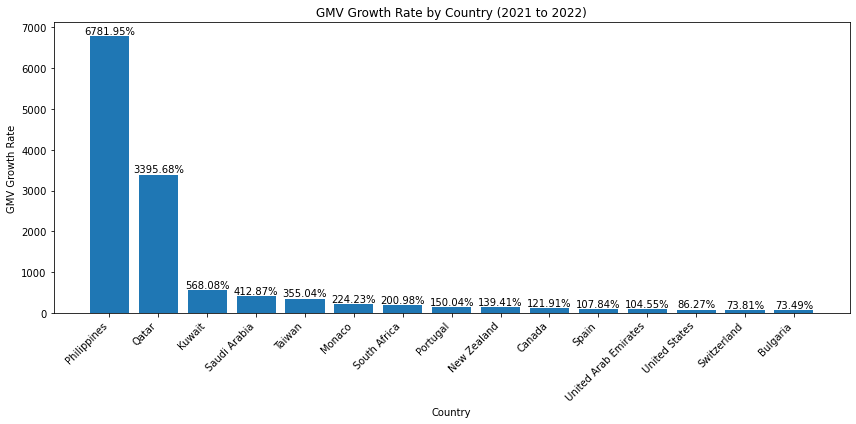

In [81]:
import matplotlib.pyplot as plt

# Sort the country_growth_rates dictionary by growth rate in descending order
sorted_growth_rates = sorted(country_growth_rates.items(), key=lambda x: x[1], reverse=True)

# Get the top 15 countries with the highest growth rates
top_15_countries = sorted_growth_rates[:15]

# Extract the country names and growth rates
countries = [country for country, _ in top_15_countries]
growth_rates = [growth_rate for _, growth_rate in top_15_countries]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(countries, growth_rates)
plt.xlabel('Country')
plt.ylabel('GMV Growth Rate')
plt.title('GMV Growth Rate by Country (2021 to 2022)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the growth rate values on top of each bar
for i, v in enumerate(growth_rates):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

No data available for Norway in 2021.
No data available for Guadeloupe in 2021.
No data available for Liechtenstein in 2021.
No data available for Indonesia in 2021.
No data available for Guernsey in 2021.
No data available for Thailand in 2021.


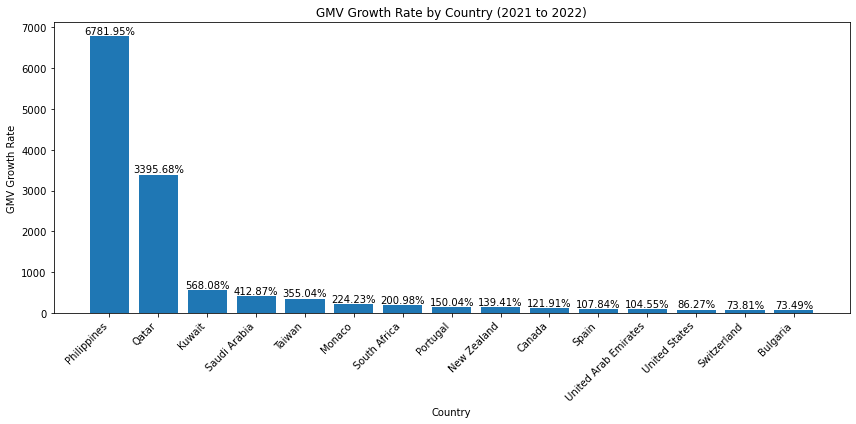

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the growth rate for each country between 2021 and 2022
country_growth_rates = {}
countries = merged_df_2021_2022['COUNTRY'].unique()

for country in countries:
    try:
        gmv_2021 = gmv_by_country_year.loc[(country, 2021)]
        gmv_2022 = gmv_by_country_year.loc[(country, 2022)]
        growth_rate = (gmv_2022 - gmv_2021) / gmv_2021 * 100
        country_growth_rates[country] = growth_rate
    except KeyError:
        print(f"No data available for {country} in 2021.")

# Sort the country_growth_rates dictionary by growth rate in descending order
sorted_growth_rates = sorted(country_growth_rates.items(), key=lambda x: x[1], reverse=True)

# Get the top 15 countries with the highest growth rates
top_15_countries = sorted_growth_rates[:15]

# Extract the country names and growth rates
countries = [country for country, _ in top_15_countries]
growth_rates = [growth_rate for _, growth_rate in top_15_countries]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(countries, growth_rates)
plt.xlabel('Country')
plt.ylabel('GMV Growth Rate')
plt.title('GMV Growth Rate by Country (2021 to 2022)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the growth rate values on top of each bar
for i, v in enumerate(growth_rates):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
import pandas as pd
df1=pd.read_excel('/Users/leenaomrani/Desktop/vestiaire_case/csv_files/DIM_VC_USR_CUSTOMER.xls')

/var/folders/qn/mtl559_57tn77j5y4wb_w49c0000gn/T/ipykernel_26958/3645737452.py:2: FutureWarning: Inferring datetime64[ns, UTC] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df1=pd.read_excel('/Users/leenaomrani/Desktop/vestiaire_case/csv_files/DIM_VC_USR_CUSTOMER.xls')
